#### Authors: Massimo Stefani, Eva Ray 

## Data Management - Labo 5

### Exercise 4 - Image compressing with KMeans

In this exercise, you will understand how to compress an image using `KMeans` and understand how RGB images are stored in your computer.

We use the images in the folder `img`. A sample of pictures are given but feel free to add more.
The base of the code is given with the imports and the loading of all `PNG` and `JPG` images. If you want to test with different pictures change the `SELECT_IMG_IDX` variable.

In [1]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from tqdm import tqdm

In [ ]:
FOLDER_IMAGES = 'data/img'
SELECT_IMG_IDX = 4

path_images = glob.glob(f'{FOLDER_IMAGES}/*.jpg') + glob.glob(f'{FOLDER_IMAGES}/*.png')
path = path_images[SELECT_IMG_IDX]

print(f'Path using index {SELECT_IMG_IDX} : {path}')

Path using index 4 : img\yparc.png


In [3]:
def load_img(path):
    img = plt.imread(path)
    return img

def plot_img(img, ax = None):
    _, ax = plt.subplots() if ax is None else (None, ax)
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

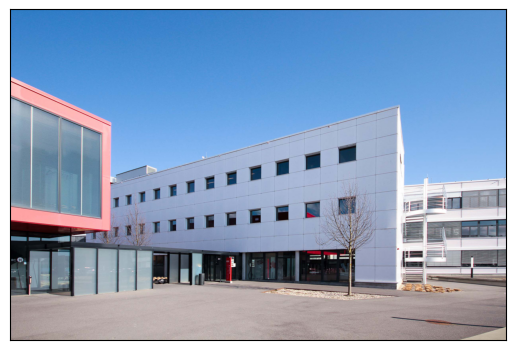

In [33]:
img = load_img(path)

plot_img(img)

In [5]:
h, w, d = img.shape
dtype = img.dtype
print(dtype, h, w, d)

float32 800 1200 3


<p style='color:red;font-weight:bold'>Exercise 4.1 - Question : </p>

Explain the 4 variables defined in the cell above (`dtype`, `h`, `w`, `d`). Why is this type with these dimensions used ? Do you find any differences when trying with other images ? If so, which are the differences and why is there some ?

*TODO: Answer here*

<p style='color:red;font-weight:bold'>Exercise 4.2 : </p>

Fill the function `plot_rgb_3d` to plot all the pixels in axis `R-G-B`. The colors in the plot need to represent the true color from the pixel image. 

In [6]:
def plot_rgb_3d(img):
    pixels = ...# Obtain all pixels
    r, g, b = ... # select the 3 channels

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # Fill the scatter function parameters 
    # Advice : Use `s=0.1` to have smaller marker points.
    # Hint : Check in case of different types !
    ax.scatter()

    ax.set(xlabel='Red', ylabel='Green', zlabel='Blue')

    plt.show()

In [ ]:
plot_rgb_3d(img)

<p style='color:red;font-weight:bold'>Exercise 4.3 : </p>

Fill the function `compress_image` to use `KMeans` algorithm to compress the image. 

In [9]:
def compress_image(img, N):
    dtype = img.dtype
    h,w,d = img.shape

    model = ... # Initiate model KMeans
    model.fit(...) # Fit model

    # Next step is using the results of the models to represent the pixels in a compressed way
    # Advice : Check what to do in case of `dtype` = 'uint8'
    # Return the compressed image in the same dimensions and type as original image.
    img_compressed =  ...
    ...

    return img_compressed

<p style='color:red;font-weight:bold'>Exercise 4.4 : </p>

Explain why the algorithm `KMeans` works to compress an image and what it does ? (In other terms, how does it find the colors to use and how to assign them ?)

*TODO: Answer here*

<p style='color:red;font-weight:bold'>Exercise 4.5 : </p>

Execute the following cell and explain what does the `assert` function checks. What could you do if the assertion fails ?

In [20]:
img_compressed = compress_image(img, 4)

assert not (
    ((img_compressed > 255).any() or (img_compressed < 0).any()) 
    if img_compressed.dtype == 'uint8' else 
    ((img_compressed > 1).any() or (img_compressed < 0).any())
    )

In [ ]:
plt.imshow(img_compressed)

*TODO: Answer here*

<p style='color:red;font-weight:bold'>Exercise 4.6 : </p>

Explain what happened in the following plot for the pixel colors.

In [ ]:
plot_rgb_3d(img_compressed)

<p style='color:red;font-weight:bold'>Exercise 4.7 : </p>

Fill the code to save all the pictures in a compressed folder, and then explain why does the size of the pictures havent changed much in some cases.

Modify the code for ploting the comparison on **the same plot** with both: original and compressed images. Do not divide original/compressed but alternate between them following these scheme (for 4 images):

```
    Original   Compressed
 ___________________________ 
|            |              |
|   original | compressed   |
|____________|______________|
|            |              |
|   original | compressed   |
|____________|______________|
            ...
```

In [ ]:
COMPRESSED_FOLDER = 'data/img/compressed'

for path in tqdm(path_images, desc='Compressing picture'):
    # Load the image and compress it
    # Save it using `Image.fromarray` (advice: if you have issues check the type !)
    ...


# Here modify the code below to iterate over original images
# And plot pictures following the scheme

fig, axs = plt.subplots(
    nrows=2,
    ncols=len(path_images)//2 if len(path_images) % 2 == 0 else len(path_images)//2 + 1,
    figsize=(15,9)
)

paths_compressed = glob.glob(f"{COMPRESSED_FOLDER}/*.jpg")+glob.glob(f"{COMPRESSED_FOLDER}/*.png")
for ax, path in zip(axs.flatten(),paths_compressed):
    img = load_img(path)
    plot_img(img, ax=ax)


for ax in axs.flatten()[-(len(axs.flatten())-len(paths_compressed)):]:
    ax.axis('off')
fig.tight_layout()

*TODO: Answer question here*

<p style='color:red;font-weight:bold'>Exercise 4.8 : </p>

Fill the code below to try multiple number of clusters and compute the error (here we chose Mean Squared Error) between the original and the compressed image.

Plots the error and explain which number of clusters (an estimation) is the most optimal and why. **The plot needs to be complete (title, correct ticks..).**

In [ ]:
def mse(img1,img2):
    return ... # Fill MSE formula

# Use these number of clusters
NN = np.arange(64,1,-4)

# TODO Iterate through number of clusters and compute the averaged error of **ALL** the images per number of cluster
# Use the `tqdm` function to have an idea how long does it run per number of clusters.
# Use when you can numpy arrays for storing the error values.
# Warning : The cell can take some time to run (~10 minutes) : during this time answer the questions starting at X.9 for example.

Compression iterations: 100%|██████████| 16/16 [10:30<00:00, 39.43s/it]


In [ ]:
# TODO Create the plot for the errors

<p style='color:red;font-weight:bold'>Exercise 4.9 : </p>

Theorically, if you reencode the picture in a new format that only accepts $N$ different colors, what is the formula to know how much space to we win compared to an `uint8` RGB picture ? If $N=16$ what is the result obtained (in %) ? Explain all steps, and detail them in LaTeX (i.e. for Markdown with sign `$`: `$x_1=\frac{10^5}{5}$` &#8594; $x_1=\frac{10^5}{5}$)

*PS : We say "theorically", because the sized of a picture is determined after using compression algorithms.*

*If you have issues for writing LaTeX, you can check [this online equation editor](https://editor.codecogs.com/).*

*TODO: Answer here*

<p style='color:red;font-weight:bold'>Exercise 4.10 : </p>

Let's retake your formula but suppose that the format can now support any RGB color for any image. What would be the technique used to minimize at best (still with no compressing) the space taken ? And what would be the updated formula ?

*Hint : use a variable $P$ for the number of pixels in the picture in your formula.*

*TODO: Answer here*